In [268]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import ticker   
import os
import math

import kuibit.cactus_scalars as cs
import kuibit.simdir as sd
from kuibit import grid_data as gd
import kuibit.unitconv as uc

from tqdm import tqdm

In [269]:
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.grid'] = True
mpl.rcParams['font.size'] = 12

In [270]:
# Conversion factors
CGmS = uc.Units(ulength=1e-2, utime=1e-3, umass=1e-3)

print(uc.geom_umass_msun(1).length / CGmS.length,
      uc.geom_umass_msun(1).time / CGmS.time,
      uc.geom_umass_msun(1).density / CGmS.density,
      sep='\n')

147664.3699472497
0.004925553195445955
6.175672383359386e+17


In [271]:
# Wether to save images or not
save = False

# DPI of the saved images
dpi = 500

# Varibales to store the figures
figures = []
figure_names = []

In [272]:
nsubgrid = [2]

# Get the unperturbed folders and sort them by resolution
sim_0_folders = sorted([path for path in os.listdir()
                           if os.path.isdir(path) and
                           path.split('_')[0] == 'TOV' and
                           path.split('_')[1] == '0' and
                           int(path.split('_')[3]) in nsubgrid],
                           key=lambda folder_name: float('.'.join(folder_name.split('_')[-1].split('-'))),
                           reverse=True)

# Save the grid spacings
sim_pert_res = [float('.'.join(folder_name.split('_')[-1].split('-'))) for folder_name in sim_0_folders]

print(sim_0_folders)

['TOV_0_subgrid_2_dx_2-0', 'TOV_0_subgrid_2_dx_1-0', 'TOV_0_subgrid_2_dx_0-5']


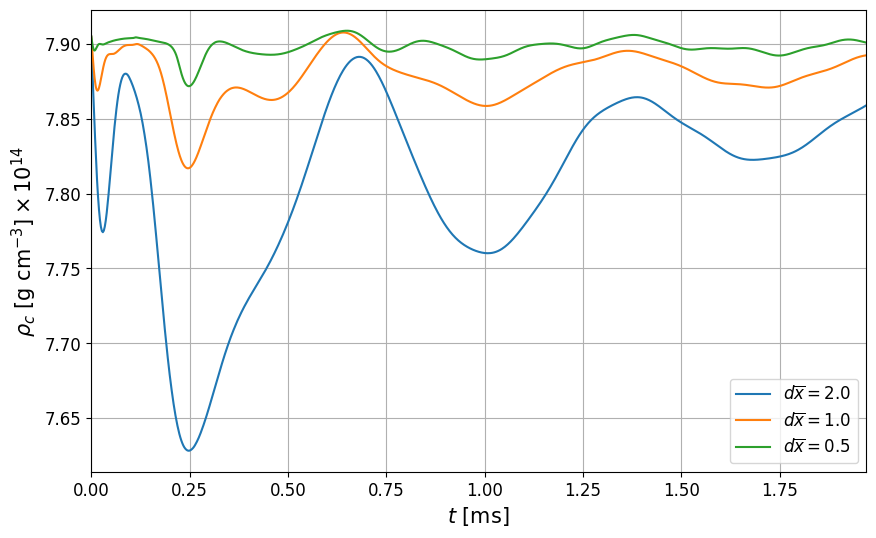

In [273]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.set_xlabel(r'$t$ $[\mathrm{ms}]$')
ax.set_ylabel(r'$\rho_c$ $[\mathrm{g\ cm^{-3}}] \times 10^{14}$')

for sim_folder, sim_res in zip(sim_0_folders, sim_pert_res):
    sim = sd.SimDir(sim_folder)
    ts = sim.ts
    rho_max = ts.maximum['rho']

    # Convert time to ms
    rho_max.time_unit_change(uc.geom_umass_msun(1).time / CGmS.time, inverse=True)

    # Convert density in g/cm^3 and divide by 10^14
    rho_data = rho_max.y * uc.geom_umass_msun(1).density / CGmS.density / 1e14
    
    # Plot central density
    ax.plot(rho_max.t, rho_data, label=r'$d\overline{{x}}={0}$'.format(sim_res))

ax.set_xlim(rho_max.t.min(), rho_max.t.max())

ax.legend()

figures.append(fig)
figure_names.append('rhoc_0_rescompare')

plt.show()

In [274]:
pert_poly_k = [110]
nsubgrid = [2]

# Get the perturbation folders and sort them by resolution
sim_pert_folders = sorted([path for path in os.listdir()
                           if os.path.isdir(path) and
                           path.split('_')[0] == 'TOV' and
                           path.split('_')[1] == 'pert' and
                           int(path.split('_')[2]) in pert_poly_k and
                           int(path.split('_')[4]) in nsubgrid],
                           key=lambda folder_name: float('.'.join(folder_name.split('_')[-1].split('-'))),
                           reverse=True)

# Save the grid spacings
sim_pert_res = [float('.'.join(folder_name.split('_')[-1].split('-'))) for folder_name in sim_pert_folders]

print(sim_pert_folders)

['TOV_pert_110_subgrid_2_dx_2-0', 'TOV_pert_110_subgrid_2_dx_1-0', 'TOV_pert_110_subgrid_2_dx_0-5']


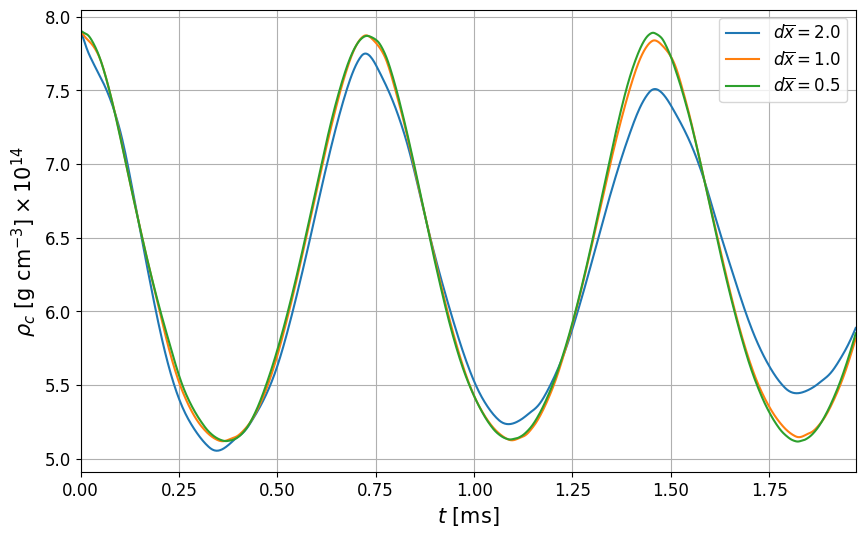

In [275]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.set_xlabel(r'$t$ $[\mathrm{ms}]$')
ax.set_ylabel(r'$\rho_c$ $[\mathrm{g\ cm^{-3}}] \times 10^{14}$')

for sim_folder, sim_res in zip(sim_pert_folders, sim_pert_res):
    sim = sd.SimDir(sim_folder)
    ts = sim.ts
    rho_max = ts.maximum['rho']

    # Convert time to ms
    rho_max.time_unit_change(uc.geom_umass_msun(1).time / CGmS.time, inverse=True)

    # Convert density in g/cm^3 and divide by 10^14
    rho_data = rho_max.y * uc.geom_umass_msun(1).density / CGmS.density / 1e14
    
    # Plot central density
    ax.plot(rho_max.t, rho_data, label=r'$d\overline{{x}}={0}$'.format(sim_res))

ax.set_xlim(rho_max.t.min(), rho_max.t.max())

ax.legend()

figures.append(fig)
figure_names.append('rhoc_pert_rescompare')

plt.show()

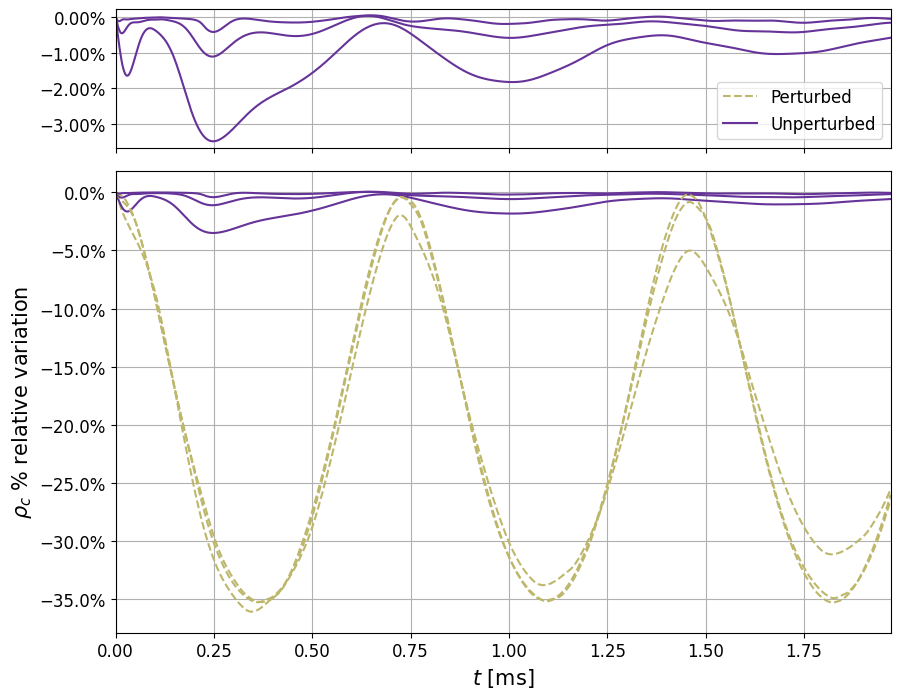

In [276]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

ax1.set_xlabel(r'$t$ $[\mathrm{ms}]$')
ax1.set_ylabel(r'$\rho_c$ % relative variation')

axins = ax1.inset_axes([0, 1.05, 1, 0.3], sharex=ax1)

axes = [ax1, axins]

for sim_pert_folder, sim_0_folder, sim_res in zip(sim_pert_folders, sim_0_folders, sim_pert_res):
    linestyles = ['--', '-']
    labels = ['Perturbed', 'Unperturbed']
    colors = ['darkkhaki', 'rebeccapurple']
    sim_list = [sd.SimDir(sim_pert_folder), sd.SimDir(sim_0_folder)]
    ts_list = [sim.ts for sim in sim_list]
    rho_max_list = [ts.maximum['rho'] for ts in ts_list]

    # Convert time to ms
    for rho_max in rho_max_list:
        rho_max.time_unit_change(uc.geom_umass_msun(1).time / CGmS.time, inverse=True)
    
    # Plot central density
    lines = []
    for rho_max, ls, lab, c in zip(rho_max_list, linestyles, labels, colors):
        lines.append(ax1.plot(rho_max.t, (rho_max.y - rho_max.y[0]) / rho_max.y[0],
                             label=lab, linestyle=ls, color=c))
        if lab == 'Unperturbed':
            detail_line = axins.plot(*lines[-1][0].get_data(),
                                     label=lab, linestyle=ls, color=c)

ax1.set_xlim(rho_max.t.min(), rho_max.t.max())

for ax in axes:
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))

# Switch off the labels of the plot above. This approach is needed because the axis are shared
# plt.setp() cycles over the given Artist (or list of Artist) and set their properties to those
# specified by the kwargs
plt.setp(axins.get_xticklabels(), visible=False)

axins.legend(handles=[l[0] for l in lines])

figures.append(fig)
figure_names.append('rhoc_all_typecompare')

plt.show()

In [277]:
# fig = plt.figure(figsize=(12, 12))

# grid_spec1 = fig.add_gridspec(2, 2)

# ax1 = fig.add_subplot(grid_spec1[0, 0])
# ax2 = fig.add_subplot(grid_spec1[0, 1])

# grid_spec2 = fig.add_gridspec(2, 3, width_ratios=[0.25, 0.5, 0.25])
# ax3 = fig.add_subplot(grid_spec2[1, 1])

# plt.show()

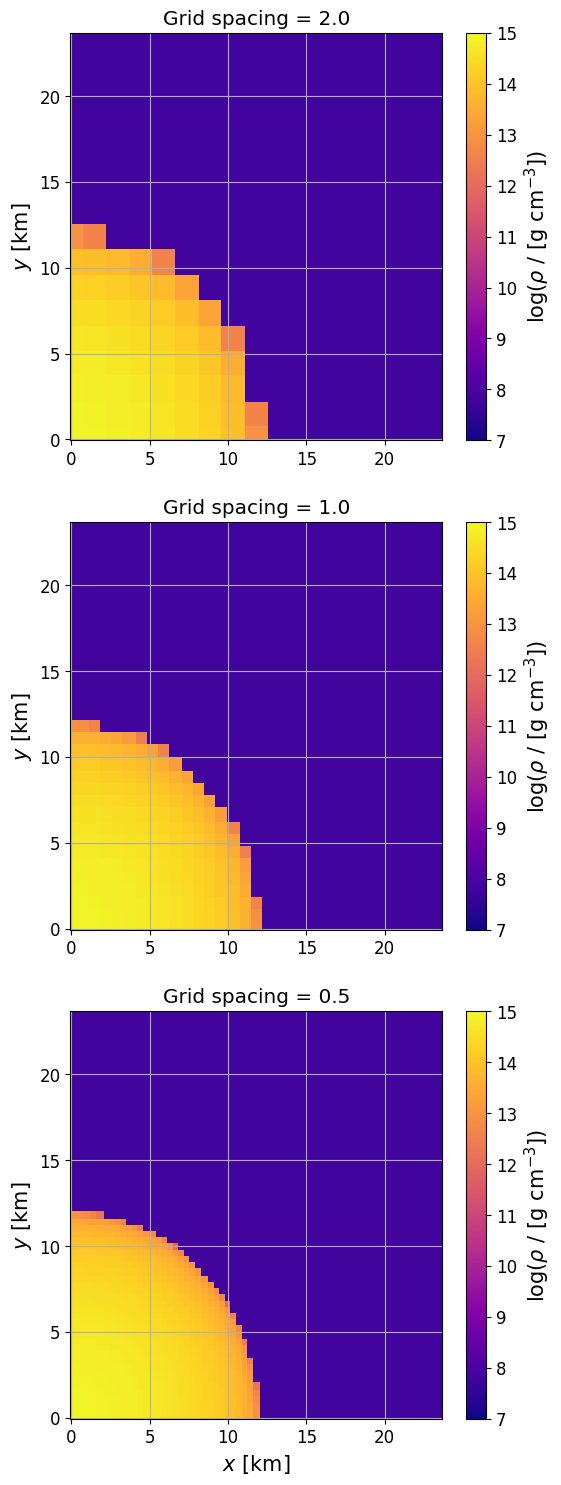

In [278]:
fig, axes = plt.subplots(3, 1, figsize=(6, 18), dpi=100)

small_grid = gd.UniformGrid([200, 200], x0=[0, 0], x1=[16, 16])

for sim_folder, sim_res, ax, i in zip(sim_pert_folders, sim_pert_res, axes, range(len(axes))):
    sim = sd.SimDir(sim_folder)
    gf = sim.gf
    rho = gf.xy['rho']

    rho_small = rho.read_on_grid(rho.iterations[0], small_grid) # First argument is the iteration number

    # Get the coordinates mesh grid and convert to km
    rho_small_coordinate_meshgrid = [coord_mesh * uc.geom_umass_msun(1).length / 1000
                                     for coord_mesh in rho_small.coordinates_meshgrid()]
    
    # Get the data and convert them to /cm^3
    rho_data = rho_small.data_xyz * uc.geom_umass_msun(1).density / CGmS.density
    
    # Round min and max data to the closer smaller and greater powers of 10 respectively
    min_max = (10 ** math.floor(np.log10(rho_data.min())), 10 ** math.ceil(np.log10(rho_data.max())))

    cf = ax.pcolormesh(*rho_small_coordinate_meshgrid, rho_data,
                       norm=mpl.colors.LogNorm(*min_max), cmap=plt.colormaps['plasma'])
    
    cb = fig.colorbar(cf, label=r'$\log(\rho\ /\ [\mathrm{g\ cm^{-3}}])$', ax=ax, format=ticker.LogFormatterExponent(10))
    cb.minorticks_off()

    # ax.set_aspect('equal')
    ax.set_title('Grid spacing = {0}'.format(sim_res))
    ax.set_ylabel(r'$y$ $[\mathrm{km}]$')

    if i == len(axes) - 1:
        ax.set_xlabel(r'$x$ $[\mathrm{km}]$')

figures.append(fig)
figure_names.append('rho_init_rescompare')

plt.show()

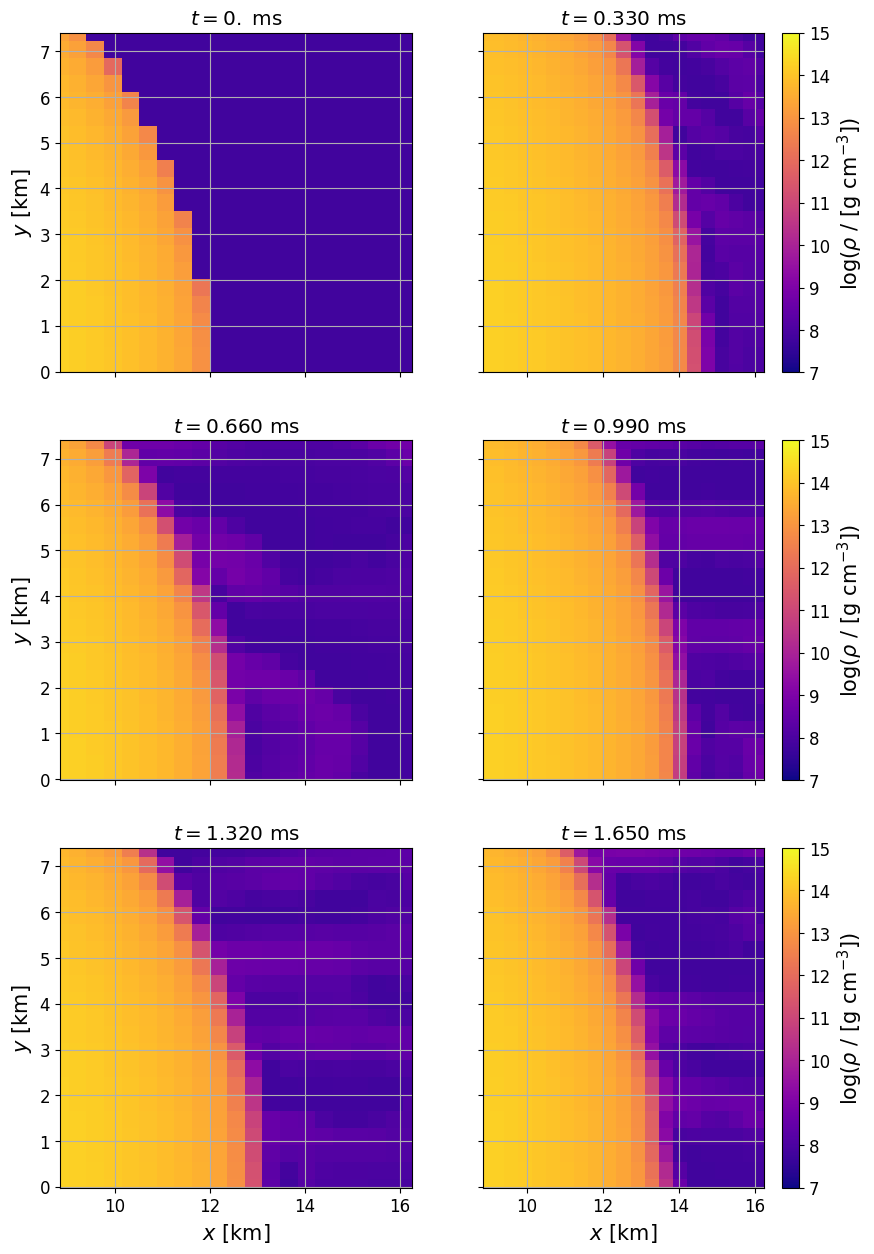

In [279]:
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), dpi=100, sharex=True, sharey=True)

small_grid = gd.UniformGrid([200, 200], x0=[6, 0], x1=[11, 5])

sim = sd.SimDir("TOV_pert_110_subgrid_2_dx_0-5")
rho = sim.gf.xy['rho']

iteration_number = n_rows * n_cols
iterations = [it for it, i in zip(rho.iterations, range(len(rho.iterations)))
              if (i % math.ceil(len(rho.iterations) / iteration_number) == 0) or
              it == rho.iterations[-1]]

for it, ax in zip(iterations, axes.flat):
    rho_small = rho.read_on_grid(it, small_grid) # First argument is the iteration number

    # Get the coordinates mesh grid and convert to km
    rho_small_coordinate_meshgrid = [coord_mesh * uc.geom_umass_msun(1).length / 1000
                                     for coord_mesh in rho_small.coordinates_meshgrid()]
    
    # Get the data and convert them to /cm^3
    rho_data = rho_small.data_xyz * uc.geom_umass_msun(1).density / CGmS.density
    
    # Round min and max data to the closer smaller and greater powers of 10 respectively
    min_max = (10 ** math.floor(np.log10(rho_data.min())), 10 ** math.ceil(np.log10(rho_data.max())))

    cf = ax.pcolormesh(*rho_small_coordinate_meshgrid, rho_data,
                       norm=mpl.colors.LogNorm(*min_max), cmap=plt.colormaps['plasma'])
    
    ax.set_title(r'$t={0}\ \mathrm{{ms}}$'.format(np.format_float_positional(rho.time_at_iteration(it) * uc.geom_umass_msun(1).time / CGmS.time, 3)))

    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(r'$y$ $[\mathrm{km}]$')

    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel(r'$x$ $[\mathrm{km}]$')
    
    # I didn't get why, but this should be done after placing the axis labels
    # otherwise some labels appears where they shouldn't
    if ax.get_subplotspec().is_last_col():
        cb = fig.colorbar(cf, label=r'$\log(\rho\ /\ [\mathrm{g\ cm^{-3}}])$', ax=ax, format=ticker.LogFormatterExponent(10))
        cb.minorticks_off()

figures.append(fig)
figure_names.append('rho_snapshots')

plt.show()

## Save results

In [280]:
## Save results
if save:
    os.makedirs('images', exist_ok=True)
    for figure, fig_name in zip(figures, figure_names):
        # The 'tight' option cuts out blank spaces in the figure and also allows the
        # visualization of inset_axes outside of the parent axis. Without it inset_axes
        # are not considered in the figure and would be cut out depending on their positioning
        figure.savefig(os.path.join('images', fig_name), dpi=dpi, bbox_inches='tight')

# Small Tutorial

In [281]:
# sim = sd.SimDir("TOV_0_subgrid_2_dx_2-0")
# sim = sd.SimDir("TOV_0_subgrid_2_dx_1-0")
# sim = sd.SimDir("TOV_0_subgrid_2_dx_0-5")

# sim = sd.SimDir("TOV_0_subgrid_4_dx_2-0")

# sim = sd.SimDir("TOV_pert_110_subgrid_2_dx_2-0")
# sim = sd.SimDir("TOV_pert_110_subgrid_2_dx_1-0")
sim = sd.SimDir("TOV_pert_110_subgrid_2_dx_0-5")

# sim = sd.SimDir("TOV_pert_150_subgrid_2_dx_2-0")

In [282]:
ts = sim.ts
print(ts)

Folder /Users/Federico/Documents/Corsi di studio/Università/Numerical Relativity/numerical_relativity_bicocca_2024_exercises/Homework_2/E2/TOV_pert_110_subgrid_2_dx_0-5
Available scalar timeseries:
[]

Available minimum timeseries:
['dens', 'alp', 'vel[0]', 'vel[1]', 'vel[2]', 'M1', 'M2', 'M3', 'betax', 'betay', 'betaz', 'w_lorentz', 'H', 'eps']

Available maximum timeseries:
['press', 'eps', 'H', 'w_lorentz', 'betax', 'betay', 'betaz', 'M1', 'M2', 'M3', 'rho', 'alp', 'vel[0]', 'vel[1]', 'vel[2]', 'dens']

Available norm1 timeseries:
['M1', 'M2', 'M3', 'H']

Available norm2 timeseries:
['M1', 'M2', 'M3', 'H']

Available average timeseries:
['physical_time_per_hour', 'current_physical_time_per_hour', 'time_total', 'time_evolution', 'time_computing', 'time_communicating', 'time_io', 'evolution_steps_count', 'local_grid_points_per_second', 'total_grid_points_per_second', 'local_grid_point_updates_count', 'total_grid_point_updates_count', 'local_interior_points_per_second', 'total_interio

In [283]:
rho_max=ts.maximum.fields.rho
press_max=ts.maximum.fields.press

In [284]:
rho_max.time_unit_change(uc.geom_umass_msun(1).time / CGmS.time, inverse=True)
press_max.time_unit_change(uc.geom_umass_msun(1).time / CGmS.time, inverse=True)

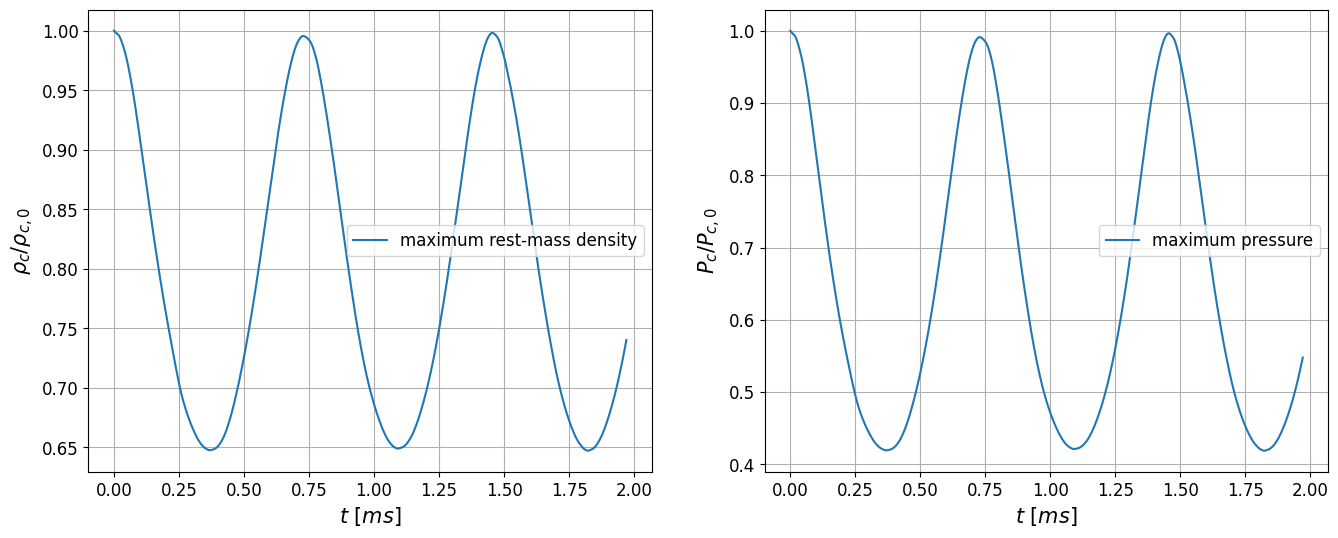

In [285]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot(121)
ax.plot(rho_max.t, rho_max.y / rho_max.y[0], label="maximum rest-mass density")
# ax.plot(rho_max.t, rho_max.y, label="maximum rest-mass density")
ax.set_xlabel(r'$t$ [$ms$]')
ax.set_ylabel(r'$\rho_c / \rho_{c,0}$')
ax.legend()

ax = plt.subplot(122)
ax.plot(press_max.t, press_max.y / press_max.y[0], label="maximum pressure")
# ax.plot(press_max.t, press_max.y, label="maximum pressure")
ax.set_xlabel(r'$t$ [$ms$]')
ax.set_ylabel(r'$P_c / P_{c,0}$')
ax.legend()

plt.show()

In [286]:
gf = sim.gf

print(gf)


Available grid data of dimension 1D (x): 
['betay', 'M2', 'M3', 'rho', 'betax', 'H', 'alp', 'M1', 'betaz']


Available grid data of dimension 1D (y): 
['betax', 'M3', 'rho', 'M2', 'betay', 'H', 'alp', 'betaz', 'M1']


Available grid data of dimension 1D (z): 
['betaz', 'M1', 'alp', 'H', 'M2', 'betay', 'betax', 'M3', 'rho']


Available grid data of dimension 2D (xy): 
['M3', 'alp', 'vel[1]', 'M1', 'betaz', 'betax', 'M2', 'betay', 'w_lorentz', 'vel[0]', 'vel[2]', 'eps', 'H', 'rho']


Available grid data of dimension 2D (xz): 
['eps', 'rho', 'H', 'vel[2]', 'w_lorentz', 'vel[0]', 'betay', 'M2', 'betaz', 'betax', 'M3', 'alp', 'vel[1]', 'M1']


Available grid data of dimension 2D (yz): 
['eps', 'H', 'rho', 'vel[2]', 'w_lorentz', 'vel[0]', 'betay', 'M2', 'betaz', 'betax', 'vel[1]', 'alp', 'M3', 'M1']


Available grid data of dimension 3D (xyz): 
[]



In [287]:
vars2D = gf.xy

print(vars2D)


Available grid data of dimension 2D (xy): 
['M3', 'alp', 'vel[1]', 'M1', 'betaz', 'betax', 'M2', 'betay', 'w_lorentz', 'vel[0]', 'vel[2]', 'eps', 'H', 'rho']



In [288]:
rho = vars2D.fields.rho

In [289]:
print(rho.iterations)

[0, 2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384, 18432, 20480, 22528, 24576, 26624, 28672, 30720, 32768, 34816, 36864, 38912, 40960, 43008, 45056, 47104, 49152, 51200, 53248, 55296, 57344, 59392, 61440, 63488, 65536, 67584, 69632, 71680, 73728, 75776, 77824, 79872, 81920, 83968, 86016, 88064, 90112, 92160, 94208, 96256, 98304, 100352, 102400, 104448, 106496, 108544, 110592, 112640, 114688, 116736, 118784, 120832, 122880, 124928, 126976, 129024, 131072, 133120, 135168, 137216, 139264, 141312, 143360, 145408, 147456, 149504, 151552, 153600, 155648, 157696, 159744, 161792, 163840, 165888, 167936, 169984, 172032, 174080, 176128, 178176, 180224, 182272, 184320, 186368, 188416, 190464, 192512, 194560, 196608, 198656, 200704, 202752, 204800, 206848, 208896, 210944, 212992, 215040, 217088, 219136, 221184, 223232, 225280, 227328, 229376, 231424, 233472, 235520, 237568, 239616, 241664, 243712, 245760, 247808, 249856, 251904, 253952, 256000, 258048, 260096, 262144, 264192, 266240, 268288, 

In [290]:
print(rho.available_times)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5, 83.0, 83.5, 84.0, 84.5,

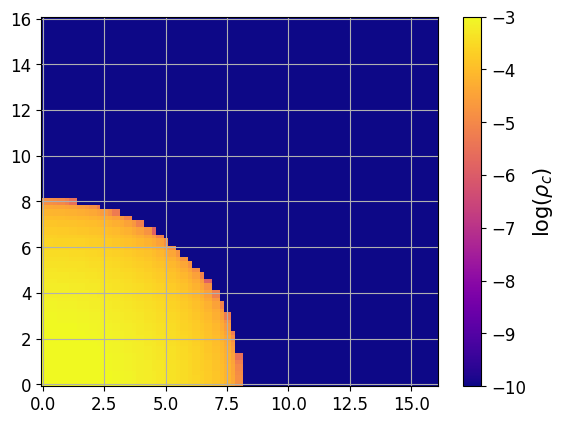

In [291]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[16, 16])

rho_small = rho.read_on_grid(rho.iterations[0], small_grid) # First argument is the iteration number

# cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3, cmap=plt.colormaps['plasma'])
plt.colorbar(cf, label=r'$\log(\rho_c)$')

plt.show()

The initial problem is spherical symmetric, but as it is clear from the plot above, the symmetry is lost due to the discreteness of the cartesian grid. If you increase the resolution you should remove the numerical error and therefore the central density should stay constant in time.

Changing the resolution is something you should always do to distinguish between the numerical effects and what are the physical effects, which should not disappear when changing the resolution.

In [292]:
# for i in rho.iterations:
#    print(i)
#    rho_small = rho.read_on_grid(i, small_grid)
#    cf2=plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
#    plt.savefig("frame_"+str(i)+".png")

In [293]:
# from IPython.display import HTML
# import matplotlib.animation as animation
# ims = []
# fig,ax = plt.subplots()

# for i in tqdm(rho.iterations[0::1]):
#     rho_small = rho.read_on_grid(i, small_grid)
#     ax.set_xlabel(r'$x (M_\odot)$')
#     ax.set_ylabel(r'$y (M_\odot)$')
#     ax.set_aspect('equal')
#     im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
#     cb = plt.colorbar(im, ax=ax)
#     title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
#     ims.append([im, title])
#     cb.remove()
#     plt.close()
    
# cb = plt.colorbar(im, ax=ax)

# ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
# HTML(ani.to_jshtml())